In [178]:
import xarray as xr
import numpy as np
from math import pi
import pandas as pd

# Temperatures

In [5]:
temps = xr.open_dataset('ERA5/temp.netcdf/data.nc')

In [19]:
temps

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 744)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-31T23:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 16:16:41 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

<div class="alert alert-block alert-info"> <b>NOTE</b> The temperature data from ERA5 Land are provided in hourly basis </div>

In [22]:
temps.time

<xarray.DataArray 'time' (time: 744)>
array(['2021-08-01T00:00:00.000000000', '2021-08-01T01:00:00.000000000',
       '2021-08-01T02:00:00.000000000', ..., '2021-08-31T21:00:00.000000000',
       '2021-08-31T22:00:00.000000000', '2021-08-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-08-01 ... 2021-08-31T23:00:00
Attributes:
    long_name:  time

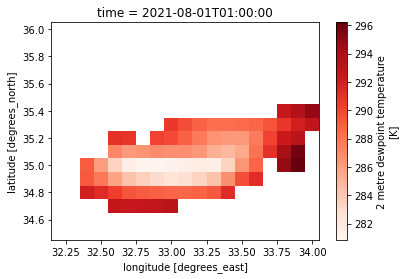

In [16]:
temps.isel(time=1).d2m.plot(cmap = 'Reds')

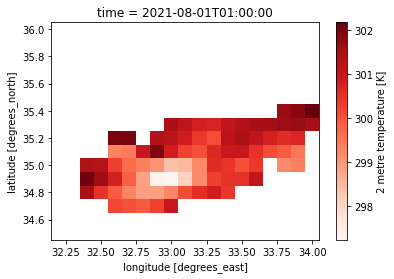

In [17]:
temps.isel(time=1).t2m.plot(cmap = 'Reds')

## We will rescale the hourly values to min, max and mean daily

In [33]:
max_temp = temps.t2m.resample(time='1D').max()

<div class="alert alert-block alert-info"> <b>NOTE</b> The variable <b>max_temp</b> has been added to the Dataset </div>

In [36]:
max_temp = temps.t2m.resample(time='1D').max(dim='time')

In [40]:
temp_dataset = max_temp.to_dataset()
temp_dataset

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) datetime64[ns] 2021-08-01 2021-08-02 ... 2021-08-31
Data variables:
    t2m        (time, latitude, longitude) float32 nan nan nan ... nan nan nan

In [41]:
temp_dataset = temp_dataset.rename({'t2m':'max_temp'})

In [43]:
temp_dataset['min_temp'] = temps.t2m.resample(time='1D').min(dim='time')
temp_dataset['mean_temp'] = temps.t2m.resample(time='1D').mean(dim='time')
temp_dataset['max_dew_temp'] = temps.t2m.resample(time='1D').max(dim='time')
temp_dataset['min_dew_temp'] = temps.t2m.resample(time='1D').min(dim='time')
temp_dataset['mean_dew_temp'] = temps.t2m.resample(time='1D').mean(dim='time')

In [44]:
temp_dataset

<xarray.Dataset>
Dimensions:        (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude      (longitude) float32 32.2 32.3 32.4 32.5 ... 33.8 33.9 34.0
  * latitude       (latitude) float32 36.0 35.9 35.8 35.7 ... 34.7 34.6 34.5
  * time           (time) datetime64[ns] 2021-08-01 2021-08-02 ... 2021-08-31
Data variables:
    max_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_temp      (time, latitude, longitude) float32 nan nan nan ... nan nan
    max_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_dew_temp  (time, latitude, longitude) float32 nan nan nan ... nan nan

# Wind

In [98]:
winds = xr.open_dataset('ERA5/wind.netcdf/data.nc')

<img src="images/windspeed-diagram.png" width="500" height="340">

Apply Euclidean theorem

In [99]:
winds['wind'] = np.sqrt(winds.u10**2+winds.v10**2)
winds

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 744)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    v10        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    wind       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 17:34:35 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

<b>We will also calculate wind direction </b><br>
The following expression calculates the wind direction in degrees based on the eastward and northward wind components, and it shifts the reference direction from east to north by adding 180 degrees. The resulting value represents the direction from which the wind is blowing, with 0 degrees being north and 90 degrees being east.

In [100]:
winds['dir'] = 180 + (180 / pi) * np.arctan2(winds.u10, winds.v10)
winds

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 744)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) datetime64[ns] 2021-08-01 ... 2021-08-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    v10        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    wind       (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    dir        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 17:34:35 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

<b>The wind direction will not get classified in sectors</b> <br><img src="images/winddircat-diagram.png" width="500" height="340"> 

In [101]:
winds['dir_cat'] = (winds.dir>0).astype(int) + (winds.dir>22.5).astype(int) + (winds.dir>67.5).astype(int) + \
    (winds.dir>112.5).astype(int) + (winds.dir>157.5).astype(int) + \
    (winds.dir>202.5).astype(int) + (winds.dir>247.5).astype(int) + \
    (winds.dir>292.5).astype(int) - 7*(winds.dir>337.5).astype(int)

<b>In order to move to daily scale we have to calculate the maximum wind velocity and its direction</b>

In [106]:
def majority(x):
    x = x.astype(int)  # Convert to integer data type
    counts = np.array(np.unique(x, return_counts=True)).T
    return np.bincount(x).argmax()
def dom_vel(x):
    return max(x)

In [110]:
winds['days'] = winds['time'].dt.date

In [111]:
np.unique(winds['days'])

array([datetime.date(2021, 8, 1), datetime.date(2021, 8, 2),
       datetime.date(2021, 8, 3), datetime.date(2021, 8, 4),
       datetime.date(2021, 8, 5), datetime.date(2021, 8, 6),
       datetime.date(2021, 8, 7), datetime.date(2021, 8, 8),
       datetime.date(2021, 8, 9), datetime.date(2021, 8, 10),
       datetime.date(2021, 8, 11), datetime.date(2021, 8, 12),
       datetime.date(2021, 8, 13), datetime.date(2021, 8, 14),
       datetime.date(2021, 8, 15), datetime.date(2021, 8, 16),
       datetime.date(2021, 8, 17), datetime.date(2021, 8, 18),
       datetime.date(2021, 8, 19), datetime.date(2021, 8, 20),
       datetime.date(2021, 8, 21), datetime.date(2021, 8, 22),
       datetime.date(2021, 8, 23), datetime.date(2021, 8, 24),
       datetime.date(2021, 8, 25), datetime.date(2021, 8, 26),
       datetime.date(2021, 8, 27), datetime.date(2021, 8, 28),
       datetime.date(2021, 8, 29), datetime.date(2021, 8, 30),
       datetime.date(2021, 8, 31)], dtype=object)

In [173]:
for i,day in enumerate(np.unique(winds['days'])):
    print(type(day))
    mask = winds['days'].isin(day)
    # Use the mask to select the data for the specific days
    ds = winds.where(mask, drop=True)
    ds['dom_dir'] = xr.DataArray(np.apply_along_axis(majority,0,ds.dir_cat),dims=['latitude','longitude'])
    ds['masked_velocity'] = ds.wind.where(ds.dir_cat==ds.dom_dir , drop=False)
    ds['dom_vel'] = ds['masked_velocity'].max(dim='time')
    ds['res_max'] = ds['wind'].max(dim='time')
    ds['dir_max'] = ds.dir_cat.where(ds.wind==ds.res_max,drop=False).max(dim='time')
    ds = ds[['dom_dir','dom_vel','res_max','dir_max']]
    ds = ds.assign_coords(time=day)
    ds = ds.expand_dims('time')
    if i == 0:
        daily_winds = ds
    else:
        daily_winds = xr.merge([daily_winds,ds])
    break

<class 'datetime.date'>


In [164]:
daily_winds

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) object 2021-08-01 2021-08-02 ... 2021-08-30 2021-08-31
Data variables:
    dom_dir    (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dom_vel    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    res_max    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    dir_max    (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 17:34:35 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

<div class="alert alert-block alert-warning"> <b>We have already built the daily temp_dataset -> Check the Dimensions </b></div>

In [165]:
temp_dataset

<xarray.Dataset>
Dimensions:        (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude      (longitude) float32 32.2 32.3 32.4 32.5 ... 33.8 33.9 34.0
  * latitude       (latitude) float32 36.0 35.9 35.8 35.7 ... 34.7 34.6 34.5
  * time           (time) datetime64[ns] 2021-08-01 2021-08-02 ... 2021-08-31
Data variables:
    max_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_temp      (time, latitude, longitude) float32 nan nan nan ... nan nan
    max_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_dew_temp  (time, latitude, longitude) float32 nan nan nan ... nan nan

In [166]:
daily_winds

<xarray.Dataset>
Dimensions:    (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude  (longitude) float32 32.2 32.3 32.4 32.5 ... 33.7 33.8 33.9 34.0
  * latitude   (latitude) float32 36.0 35.9 35.8 35.7 ... 34.8 34.7 34.6 34.5
  * time       (time) object 2021-08-01 2021-08-02 ... 2021-08-30 2021-08-31
Data variables:
    dom_dir    (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dom_vel    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    res_max    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    dir_max    (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 17:34:35 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [169]:
meteorological_data = xr.merge([daily_winds,temp_dataset])
meteorological_data

<xarray.Dataset>
Dimensions:        (longitude: 19, latitude: 16, time: 31)
Coordinates:
  * longitude      (longitude) float32 32.2 32.3 32.4 32.5 ... 33.8 33.9 34.0
  * latitude       (latitude) float32 36.0 35.9 35.8 35.7 ... 34.7 34.6 34.5
  * time           (time) object 2021-08-01 2021-08-02 ... 2021-08-30 2021-08-31
Data variables:
    dom_dir        (time, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0
    dom_vel        (time, latitude, longitude) float32 nan nan nan ... nan nan
    res_max        (time, latitude, longitude) float32 nan nan nan ... nan nan
    dir_max        (time, latitude, longitude) float64 nan nan nan ... nan nan
    max_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_temp       (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_temp      (time, latitude, longitude) float32 nan nan nan ... nan nan
    max_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    min_dew_temp   (time, latitude, longitude) float32 nan nan nan ... nan nan
    mean_dew_temp  (time, latitude, longitude) float32 nan nan nan ... nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-01 17:34:35 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [176]:
meteorological_data['time'] = pd.to_datetime(meteorological_data['time'])
meteorological_data.to_netcdf('meteo_nc/meteorological_data_082021.nc')